In [1]:
import numpy as np
import pandas as pd
import xgboost
import shap
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report

/Users/zdx_macos/miniforge3/envs/conda-rdkit/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
# df = pd.read_csv("New Project 2_Ranking_2022-10-27_17-24-28.csv")
df = pd.read_csv("New Project 3_Ranking_2022-12-06_10-02-43.csv")

In [10]:
df.columns = [c.replace("[", "").replace("]", "").replace("<","") for c in df.columns]

In [11]:
df = df.set_index("Name")
labels = [col for col in df.columns if "covid" in col.lower()]
tot_pop = [col for col in df.columns if "total" in col.lower()][0]
y = df[labels]
# Normalized y
# print(y)
y_lab = y[labels[0]]/df[tot_pop]
# df = df[df[labels[11]].isna() == False]
df = df[y_lab.isna() == False]
y_lab = y_lab[y_lab.isna() == False]
x = df.drop(labels, axis=1)
# x = x.drop(tot_pop, axis=1)
bad_col = [c for c in x.columns if x[c].isna().sum() > 10]
x = x.drop(bad_col, axis=1)
print(y_lab.shape)
print(x.shape)

(3140,)
(3140, 127)


In [12]:
y_lab = np.where(y_lab > np.median(y_lab), 1, 0)

(array([1570.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1570.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

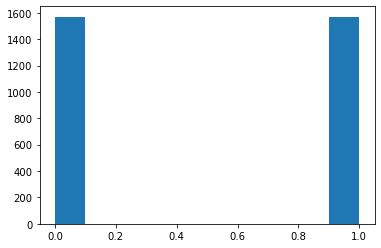

In [13]:
plt.hist(y_lab)

In [14]:
labels

['Prevalence of deaths from COVID-19 (per 100,000 individuals) as of December 31, 2020',
 'Prevalence of confirmed COVID-19 cases (per 100,000 individuals) as of December 31, 2020']

In [15]:
for c in x.columns:
    x[c].fillna(value=x[c].mean(), inplace=True)

In [16]:
X_T, X_test, y_T, y_test = train_test_split(x, y_lab, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_T, y_T, test_size=0.20, random_state=42)

In [17]:
for c in X_train.columns:
    if X_train[c].isna().sum()> 1:
        print(c)
X_train.isna().sum().sum()
lm = LinearRegression().fit(X_train, y_train)

In [18]:
y_pred = lm.predict(X_test)
# The mean squared error
print("Mean squared error: %.9f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 0.173541813
Coefficient of determination: 0.31


In [148]:
for c in X_train.columns:
    if X_train[c].isna().sum()> 1:
        print(c)
print(X_train.isna().sum().sum())
clf = LogisticRegression(penalty="l1", solver="liblinear").fit(X_train, y_train)

0


Liblinear failed to converge, increase the number of iterations.


In [149]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.66      0.69       229
           1       0.70      0.74      0.72       242

    accuracy                           0.70       471
   macro avg       0.71      0.70      0.70       471
weighted avg       0.71      0.70      0.70       471



In [133]:
y_train_pred = clf.predict(X_train)

In [134]:
X_train_low = X_train[y_train_pred == 0]
X_train_high = X_train[y_train_pred == 1]

y_train_low = y_train[y_train_pred == 0]
y_train_high = y_train[y_train_pred == 1]

X_test_low = X_test[y_pred == 0]
X_test_high = X_test[y_pred == 1]

y_test_low = y_test[y_pred == 0]
y_test_high = y_test[y_pred == 1]

In [129]:
lm_low = LinearRegression().fit(X_train_low, y_train_low)
lm_high = LinearRegression().fit(X_train_high, y_train_high)

In [133]:
y_pred_low = lm_low.predict(X_test_low)
y_pred_high = lm_high.predict(X_test_high)

In [134]:
# The coefficients
print("Coefficients: \n", lm_low.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_low, y_pred_low))
print("Mean squared error: %.2f" % mean_squared_error(y_test_high, y_pred_high))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_low, y_pred_low))
print("Coefficient of determination: %.2f" % r2_score(y_test_high, y_pred_high))

Coefficients: 
 [ 5.13968350e-07 -3.13111913e-04 -3.30094475e-04  3.33994875e-04
 -3.27449390e-04 -3.10195709e-04 -3.06281731e-04  3.63869274e-04
  9.54163811e-05  2.43193963e-04  3.72168745e-04  2.77271437e-04
  2.79702530e-04  2.91445601e-04  1.63150334e-04  1.99514159e-04
  2.65327671e-04  9.79302937e-05  1.16821887e-04  2.58307103e-04
  4.35525945e-05  3.86216656e-04  4.11016770e-04 -6.40263271e-04
  9.74505923e-04  9.74415377e-04  9.79240691e-04  9.88161281e-04
  9.86737645e-04  9.71870477e-04  9.82886541e-04 -8.34186161e-05
  1.17880131e-03 -1.20476091e-04 -1.61754816e-04 -2.05962580e-04
 -2.61417300e-04 -3.06626400e-04 -2.40120628e-04 -2.45214100e-04
 -2.49909888e-04 -4.01206152e-05 -8.48750888e-05 -2.98294167e-05
 -2.07456578e-04 -5.26307927e-05  1.56460882e-03 -4.13388712e-03
  2.56739996e-03  2.68240958e-03  2.76916389e-03  2.57894787e-03
  2.66367747e-03  2.64323815e-03  2.62934926e-03 -1.49426701e-03
 -3.57518658e-03  3.56497665e-03 -3.37024908e-03  1.97036138e-04
  3.31339

In [19]:
y_pred = lm.predict(X_test)

In [20]:
# The coefficients
print("Coefficients: \n", lm.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
ax = y_lab.plot.hist(bins=100, alpha=0.5)


Coefficients: 
 [-1.50339023e-06 -3.32543567e-08 -5.13729221e-02 -7.98779812e-02
 -1.11843384e-01 -1.25849145e-01 -1.21055686e-01 -1.12175422e-01
 -1.02785920e-01 -1.14715857e-01 -1.02462803e-01 -7.66269051e-02
 -1.28330324e-01 -1.18506856e-01 -2.87731156e+02 -2.87638774e+02
  2.87660688e+02 -2.87663210e+02  2.34058043e-01  2.38474186e-01
  2.37424397e-01  2.39492866e-01  2.34674354e-01  2.31644948e-01
  2.12976683e-01  2.81994019e-03  2.27827367e-02  1.75204706e-02
  9.81788614e-03  1.29168653e-02  4.83015882e-03  1.06869368e-02
  6.60500162e-03  1.18063053e-02  1.57055837e-02  7.19377336e-04
  1.25537644e-02  2.55249406e-02 -2.02503380e-01 -2.02049819e-01
 -2.14033273e-01 -2.05307539e-01 -8.16147007e+01 -8.16415618e+01
 -8.16664866e+01 -8.16027722e+01  8.14133835e+01 -1.40444999e-01
 -1.43460745e-01 -1.09663000e-02 -1.13083132e+00  1.14806886e+00
  1.15550293e+00 -1.65604940e+00  1.65905485e+00  1.72399681e+00
  1.68676682e+00  1.70104176e+00  1.71017647e+00  1.67123460e-02
  1.82618

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [26]:
midpoint = np.median(y_lab)

In [28]:
norm_y_df = df.copy()
norm_y_df["mortality_covid_2020"] = y[labels[11]]/df[tot_pop]

In [33]:
upper_norm_y_df= norm_y_df[norm_y_df["mortality_covid_2020"] > midpoint]
lower_norm_y_df= norm_y_df[norm_y_df["mortality_covid_2020"] <= midpoint]

(array([1.352e+03, 1.168e+03, 4.240e+02, 1.280e+02, 3.800e+01, 1.500e+01,
        1.000e+01, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([  0.     ,  84.38819, 168.77638, 253.16457, 337.55276, 421.94095,
        506.32914, 590.71733, 675.10552, 759.49371, 843.8819 ]),
 <BarContainer object of 10 artists>)

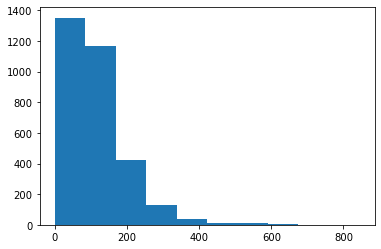

In [80]:
plt.hist(df[labels[0]])

(1223, 280)


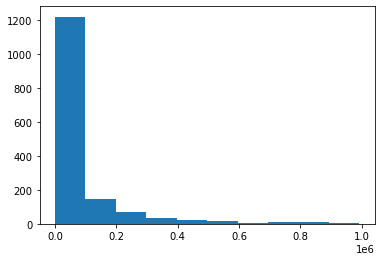

In [48]:
low_pop_df = lower_norm_y_df[lower_norm_y_df[tot_pop] < 1e6]
plt.hist(low_pop_df[tot_pop])
print(lower_norm_y_df[lower_norm_y_df[tot_pop] < 1e5].shape)

(1320, 280)


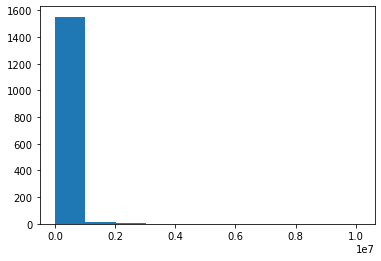

In [49]:
up_pop_df = upper_norm_y_df[upper_norm_y_df[tot_pop] < 1e6]
plt.hist(upper_norm_y_df[tot_pop])
print(upper_norm_y_df[upper_norm_y_df[tot_pop] < 1e5].shape)

26.0


(array([2604.,  234.,  101.,   47.,   21.,   34.,   16.,   11.,    3.,
           9.]),
 array([  0. ,  98.3, 196.6, 294.9, 393.2, 491.5, 589.8, 688.1, 786.4,
        884.7, 983. ]),
 <BarContainer object of 10 artists>)

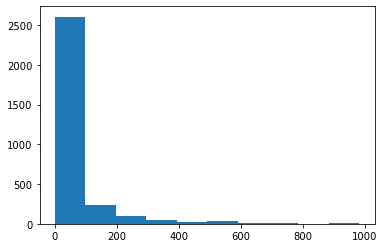

In [63]:
tot_death = df[labels[11]]
print(np.median(tot_death))
plt.hist(tot_death[tot_death < 1000])

In [20]:
[c for c in X_train.columns if "covid" in c.lower()]

['# Total deaths from COVID-19 as of January 31, 2020',
 '# Total deaths from COVID-19 as of February 29, 2020',
 '# Total deaths from COVID-19 as of March 31, 2020',
 '# Total deaths from COVID-19 as of April 30, 2020',
 '# Total deaths from COVID-19 as of May 31, 2020',
 '# Total deaths from COVID-19 as of June 30, 2020',
 '# Total deaths from COVID-19 as of July 31, 2020',
 '# Total deaths from COVID-19 as of August 31, 2020',
 '# Total deaths from COVID-19 as of September 29, 2020',
 '# Total deaths from COVID-19 as of October 12, 2020',
 '# Total deaths from COVID-19 as of November 21, 2020',
 '# Total deaths from COVID-19 as of December 31, 2020',
 '# Total confirmed COVID-19 cases as of January 31, 2020',
 '# Total confirmed COVID-19 cases as of February 29, 2020',
 '# Total confirmed COVID-19 cases as of March 31, 2020',
 '# Total confirmed COVID-19 cases as of April 30, 2020',
 '# Total confirmed COVID-19 cases as of May 31, 2020',
 '# Total confirmed COVID-19 cases as of June

In [21]:

xgb = xgboost.XGBRegressor(n_estimators=100, max_depth=10, tree_method="hist", eval_metric=mean_squared_error)

In [22]:
xgb.fit(X_train, y_train, eval_set=[(X_valid, y_valid)])

[0]	validation_0-rmse:0.41972
[1]	validation_0-rmse:0.38396
[2]	validation_0-rmse:0.36613
[3]	validation_0-rmse:0.35740
[4]	validation_0-rmse:0.34992
[5]	validation_0-rmse:0.35213
[6]	validation_0-rmse:0.35360
[7]	validation_0-rmse:0.35431
[8]	validation_0-rmse:0.35522
[9]	validation_0-rmse:0.35652
[10]	validation_0-rmse:0.35612
[11]	validation_0-rmse:0.35588
[12]	validation_0-rmse:0.35599
[13]	validation_0-rmse:0.35584
[14]	validation_0-rmse:0.35582
[15]	validation_0-rmse:0.35552
[16]	validation_0-rmse:0.35547
[17]	validation_0-rmse:0.35541
[18]	validation_0-rmse:0.35536
[19]	validation_0-rmse:0.35551
[20]	validation_0-rmse:0.35541
[21]	validation_0-rmse:0.35540
[22]	validation_0-rmse:0.35541
[23]	validation_0-rmse:0.35539
[24]	validation_0-rmse:0.35542
[25]	validation_0-rmse:0.35539
[26]	validation_0-rmse:0.35551
[27]	validation_0-rmse:0.35548
[28]	validation_0-rmse:0.35549
[29]	validation_0-rmse:0.35547
[30]	validation_0-rmse:0.35549
[31]	validation_0-rmse:0.35551
[32]	validation_0-

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eval_metric=<function mean_squared_error at 0x12dc5a820>, gamma=0,
             gpu_id=-1, importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='hist', validate_parameters=1,
             verbosity=None)

In [152]:
y_pred = xgb.predict(X_test)
# The mean squared error
print("Mean squared error: %.9f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.4f" % r2_score(y_test, y_pred))

Mean squared error: 0.219828857
Coefficient of determination: 0.1200


In [153]:
np.mean(y_pred)

0.49694374

In [154]:
xgb_low = xgboost.XGBRegressor(n_estimators=100, max_depth=10, tree_method="hist", eval_metric=mean_squared_error)
xgb_high = xgboost.XGBRegressor(n_estimators=100, max_depth=10, tree_method="hist", eval_metric=mean_squared_error)

In [155]:
xgb_low.fit(X_train_low, y_train_low, eval_set=[(X_test_low, y_test_low)])
xgb_high.fit(X_train_high, y_train_high, eval_set=[(X_test_high, y_test_high)])

[0]	validation_0-rmse:0.47236
[1]	validation_0-rmse:0.47007
[2]	validation_0-rmse:0.46573
[3]	validation_0-rmse:0.47349
[4]	validation_0-rmse:0.47691
[5]	validation_0-rmse:0.47540
[6]	validation_0-rmse:0.47826
[7]	validation_0-rmse:0.47757
[8]	validation_0-rmse:0.47684
[9]	validation_0-rmse:0.47573
[10]	validation_0-rmse:0.47601
[11]	validation_0-rmse:0.47590
[12]	validation_0-rmse:0.47548
[13]	validation_0-rmse:0.47562
[14]	validation_0-rmse:0.47497
[15]	validation_0-rmse:0.47558
[16]	validation_0-rmse:0.47541
[17]	validation_0-rmse:0.47523
[18]	validation_0-rmse:0.47509
[19]	validation_0-rmse:0.47508
[20]	validation_0-rmse:0.47509
[21]	validation_0-rmse:0.47512
[22]	validation_0-rmse:0.47523
[23]	validation_0-rmse:0.47514
[24]	validation_0-rmse:0.47508
[25]	validation_0-rmse:0.47497
[26]	validation_0-rmse:0.47496
[27]	validation_0-rmse:0.47492
[28]	validation_0-rmse:0.47485
[29]	validation_0-rmse:0.47490
[30]	validation_0-rmse:0.47487
[31]	validation_0-rmse:0.47495
[32]	validation_0-

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eval_metric=<function mean_squared_error at 0x16d654820>, gamma=0,
             gpu_id=-1, importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='hist', validate_parameters=1,
             verbosity=None)

In [25]:
# y_pred_low = xgb.predict(X_test_low)
# y_pred_high = xgb.predict(X_test_high)
y_pred = xgb.predict(X_test)
# The mean squared error
# print("Mean squared error: %.9f" % mean_squared_error(y_test_low, y_pred_low))
# print("Mean squared error: %.9f" % mean_squared_error(y_test_high, y_pred_high))
print("Mean squared error: %.9f" % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
# print("Coefficient of determination: %.4f" % r2_score(y_test_low, y_pred_low))
# print("Coefficient of determination: %.4f" % r2_score(y_test_high, y_pred_high))
print("Coefficient of determination: %.4f" % r2_score(y_test, y_pred))

Mean squared error: 0.126807618
Coefficient of determination: 0.4925


In [37]:
from sklearn.model_selection import GridSearchCV

# Set up the parameters for the XGBoost model
parameters = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 500, 1000]
}

clf = GridSearchCV(xgb, parameters, scoring='neg_mean_squared_error', cv=3)

clf.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print(clf.best_params_)

y_pred = clf.predict(X_test)

y_train_pred = clf.predict(X_train)
# Calculate the mean squared error

mse_train = mean_squared_error(y_train, y_train_pred)
mse = mean_squared_error(y_test, y_pred)

# Calculate the R^2 statistic
r2_train = r2_score(y_train, y_train_pred)
r2 = r2_score(y_test, y_pred)

# Print the mean squared error and the R^2 statistic
print("Mean squared error:", mse)
print("R^2:", r2)

print("Mean squared error train:", mse_train)
print("R^2 train:", r2_train)

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000}
Mean squared error: 0.10958628550240172
R^2: 0.5614156384243496
Mean squared error train: 0.05056290444241073
R^2 train: 0.7977000509951797


In [33]:
from sklearn.linear_model import ElasticNetCV
# from sklearn.model_selection import GridSearchCV
parameters = {
    'alphas': [[0.1], [1.0], [10.0]],
    'max_iter': [10000, 100000, 1000000],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

# Initialize the linear regression model with L1 and L2 regularization (Elastic Net)
enet_model = ElasticNetCV()

# Use GridSearchCV to find the best hyperparameters for the linear regression model
clf = GridSearchCV(enet_model, parameters, cv=3)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print(clf.best_params_)

y_pred = clf.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the R^2 statistic
r2 = r2_score(y_test, y_pred)

# Print the mean squared error and the R^2 statistic
print("Mean squared error:", mse)
print("R^2:", r2)

{'alphas': [0.1], 'l1_ratio': 0.1, 'max_iter': 10000}
Mean squared error: 0.16052812245908343
R^2: 0.35753708795876715


In [57]:
Xd = xgboost.DMatrix(X_test, label=y_test)
Xv = xgboost.DMatrix(X_valid, label=y_valid)
xgb_model = xgboost.train({
    'n_estimators':1000, 'max_depth':3, 'learning_rate':0.01
}, Xd, 1)
pred = xgb_model.predict(Xd, output_margin=True)
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(Xd)
np.abs(shap_values.sum(1) + explainer.expected_value - pred).max()

[20:09:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




0.0

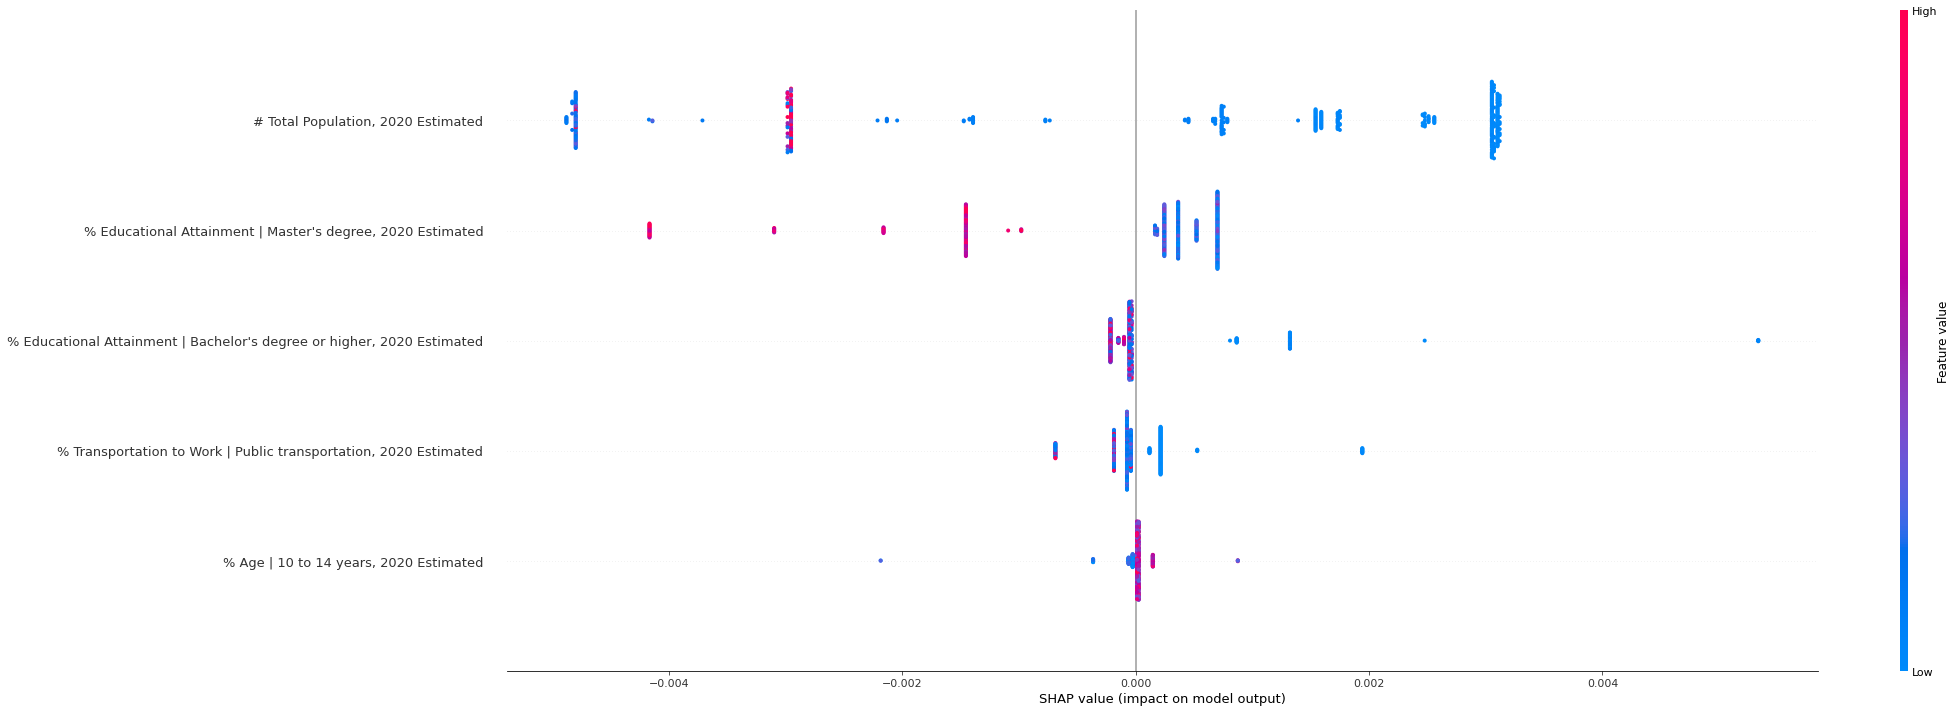

In [60]:
shap.summary_plot(shap_values, X_test, max_display=5, plot_size=(30, 10))

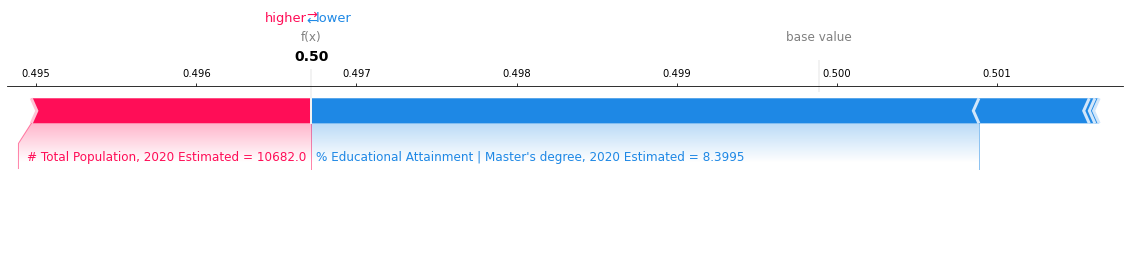

In [79]:
shap_plot= shap.force_plot(explainer.expected_value, shap_values[-1:], X_test[-1:], matplotlib=True, show=False, plot_cmap=['#77dd77', '#f99191'])

In [70]:
shap_plot

divide by zero encountered in double_scalars


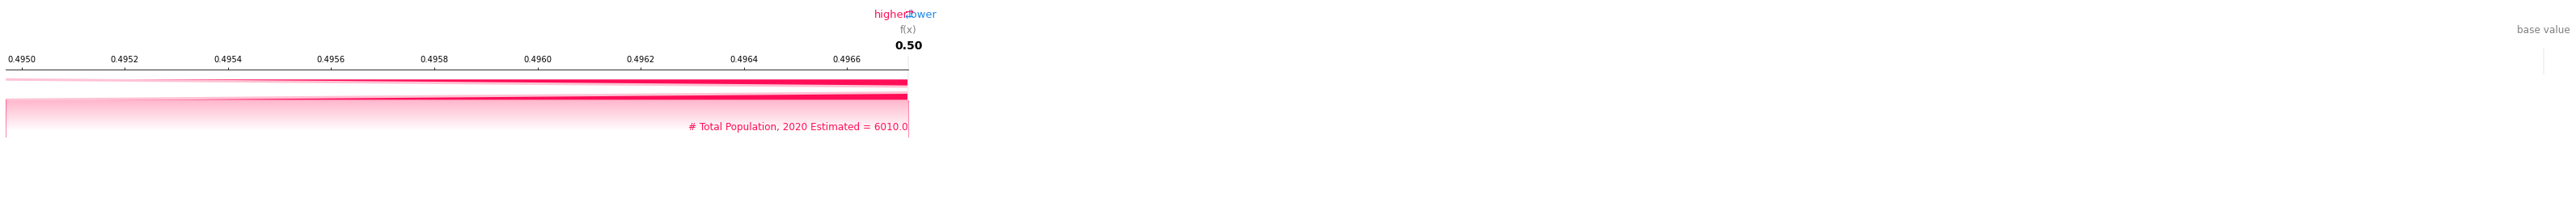

In [68]:
shap_plot = shap.force_plot(explainer.expected_value, 
    shap_values[-1:], features=X_valid.iloc[-1:], 
    feature_names=X_valid.columns[0:5],
    matplotlib=True, show=False, plot_cmap=['#77dd77', '#f99191'])

In [44]:
fig,ax = shap.partial_dependence_plot(
    labels[11], xgb_model.predict, X_valid, feature_names = X_valid.columns,
    shap_values=shap_values_xgb
)

IndexError: list index out of range

In [117]:
shap_values_xgb = explainer(Xd)
shap.plots.scatter(shap_values_xgb[:y_lab])

TypeError: only integer scalar arrays can be converted to a scalar index

In [51]:
computer = [c for c in df.columns if "master" in c.lower()]

In [52]:
computer

["% Educational Attainment | Master's degree, 2020 Estimated"]

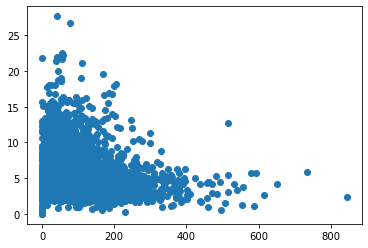

In [53]:
plt.scatter(df[labels[0]], df[computer[0]])

['# Total Population, 2020 Estimated']


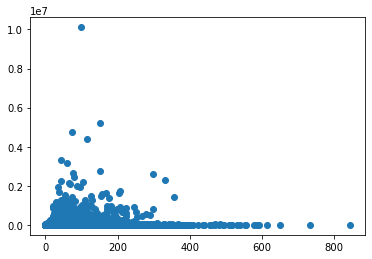

In [54]:
pop = [c for c in df.columns if "population" in c.lower()]
print(pop)
plt.scatter(df[labels[0]], df[pop[0]])

['% Transportation to Work | Car, truck, or van, 2020 Estimated', '% Transportation to Work | Car, truck, or van, Drove alone, 2020 Estimated', '% Transportation to Work | Car, truck, or van, Carpooled, 2020 Estimated', '% Transportation to Work | Public transportation, 2020 Estimated', '% Transportation to Work | Public transportation, Bus or trolley bus, 2020 Estimated', '% Transportation to Work | Public transportation, Public transportation, Streetcar or trolley car, 2020 Estimated', '% Transportation to Work | Public transportation, Subway or elevated, 2020 Estimated', '% Transportation to Work | Public transportation, Railroad, 2020 Estimated', '% Transportation to Work | Public transportation, Ferryboat, 2020 Estimated', '% Transportation to Work | Bicycle, 2020 Estimated', '% Transportation to Work | Walked, 2020 Estimated', '% Transportation to Work | Taxicab, motorcycle, or other means, 2020 Estimated', '% Transportation to Work | Worked at home, 2020 Estimated', '% Occupatio

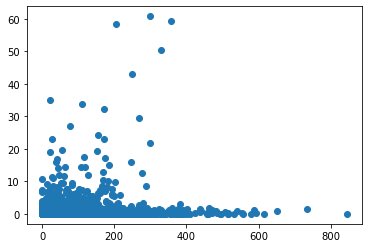

In [56]:
transport = [c for c in df.columns if "transportation" in c.lower()]
print(transport)
plt.scatter(df[labels[0]], df[transport[3]])